In [29]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [30]:
cifar10 = tf.keras.datasets.cifar10

(train_inputs, train_labels), (test_inputs, test_labels) = cifar10.load_data()

In [31]:
print(train_inputs.shape)
print(train_labels.shape)

(50000, 32, 32, 3)
(50000, 1)


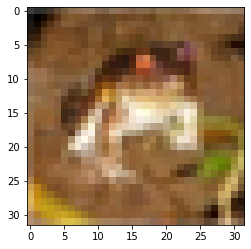

In [32]:
plt.imshow(train_inputs[0])
plt.show()

In [33]:
train_inputs = train_inputs / 255.0
test_inputs = test_inputs / 255.0

In [34]:
model = keras.Sequential([
                          keras.Input(shape=(32,32,3)),
                          keras.layers.Flatten(),
                          keras.layers.Dense(128,activation='relu'),
                          keras.layers.Dense(10,activation='softmax'),
                          ])

In [35]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 3072)              0         
                                                                 
 dense_9 (Dense)             (None, 128)               393344    
                                                                 
 dense_10 (Dense)            (None, 10)                1290      
                                                                 
Total params: 394,634
Trainable params: 394,634
Non-trainable params: 0
_________________________________________________________________


In [36]:
model_flatten = tf.keras.Model(inputs=model.input, outputs=model.layers[0].output)
test_output1 = model_flatten(tf.expand_dims(train_inputs[0],axis=0))
print(test_output1)

tf.Tensor([[0.23137255 0.24313726 0.24705882 ... 0.48235294 0.36078432 0.28235295]], shape=(1, 3072), dtype=float32)


In [37]:
model_dense1 = tf.keras.Model(inputs=model.input, outputs=model.layers[1].output)
test_output2 = model_dense1(tf.expand_dims(train_inputs[0],axis=0))
print(test_output2)

tf.Tensor(
[[0.         0.         0.         0.         0.1792343  0.
  0.         0.7785615  0.         0.41604945 0.49682203 1.5688543
  0.8508504  0.06899011 0.13441075 0.8702435  0.50019884 0.561936
  0.35094672 0.         0.31131908 0.02098805 0.         0.34333557
  0.9266428  0.         0.         0.         0.         0.
  1.1366234  0.         0.         0.         0.         0.
  0.         0.         0.         0.7601518  0.60514635 0.
  1.09964    0.         0.23117642 0.         0.6553364  0.
  0.5211563  0.         0.         0.         0.         0.
  0.24255735 0.7134427  0.6730896  0.6191208  0.4560117  1.202316
  0.9409227  1.427356   1.1296386  0.         0.         0.07489868
  0.19693694 0.         0.         0.         0.         0.30531934
  0.77706355 0.         0.33908895 0.5458358  1.188494   0.252843
  0.         0.5302079  0.         0.         0.2995571  0.
  0.5128911  1.2355131  0.9922369  0.00957065 0.37569493 0.22028455
  0.27845725 0.97001725 0.460071

In [38]:
model_dense2 = tf.keras.Model(inputs=model.input, outputs=model.layers[2].output)
test_output3 = model_dense2(tf.expand_dims(train_inputs[0],axis=0))
print(test_output3)

tf.Tensor(
[[0.20494321 0.02664974 0.0521927  0.19892424 0.02557576 0.2325079
  0.07765593 0.05564053 0.07052614 0.05538382]], shape=(1, 10), dtype=float32)


In [39]:
model.compile(optimizer='Adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['acc'])

In [40]:
model.fit(x=train_inputs,
          y=train_labels,
          batch_size=8,
          epochs=20,
          validation_data=(test_inputs,test_labels))

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


6250/6250 [==============================] - 21s 3ms/step - loss: 2.1418 - acc: 0.1694 - val_loss: 2.0989 - val_acc: 0.1653
Epoch 2/20
6250/6250 [==============================] - 21s 3ms/step - loss: 2.0891 - acc: 0.1755 - val_loss: 2.0684 - val_acc: 0.1845
Epoch 3/20
6250/6250 [==============================] - 22s 3ms/step - loss: 2.0791 - acc: 0.1794 - val_loss: 2.0702 - val_acc: 0.1818
Epoch 4/20
6250/6250 [==============================] - 22s 3ms/step - loss: 2.0745 - acc: 0.1812 - val_loss: 2.0623 - val_acc: 0.1646
Epoch 5/20
6250/6250 [==============================] - 21s 3ms/step - loss: 2.0713 - acc: 0.1788 - val_loss: 2.0720 - val_acc: 0.1683
Epoch 6/20
6250/6250 [==============================] - 21s 3ms/step - loss: 2.0685 - acc: 0.1800 - val_loss: 2.0562 - val_acc: 0.1764
Epoch 7/20
6250/6250 [==============================] - 22s 4ms/step - loss: 2.0654 - acc: 0.1819 - val_loss: 2.1257 - val_acc: 0.1661
Epoch 8/20
6250/6250 [==============================] - 21s 3ms/st

In [41]:

model = keras.Sequential([
                          keras.Input(shape=(32,32,3)),
                          tf.keras.layers.Conv2D(12, (5,5), strides=(1,1), padding='valid'),
                          tf.keras.layers.MaxPool2D(),
                          tf.keras.layers.Conv2D(8, (5,5), strides=(1,1), padding='valid'),
                          keras.layers.Flatten(),
                          keras.layers.Dense(128,activation='relu'),
                          keras.layers.Dense(10,activation='softmax')
                          ])

In [42]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 12)        912       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 12)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 10, 10, 8)         2408      
                                                                 
 flatten_7 (Flatten)         (None, 800)               0         
                                                                 
 dense_11 (Dense)            (None, 128)               102528    
                                                                 
 dense_12 (Dense)            (None, 10)                1290      
                                                      

In [43]:
model.compile(optimizer='Adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['acc'])

In [44]:
model.fit(x=train_inputs,
          y=train_labels,
          batch_size=8,
          epochs=20,
          validation_data=(test_inputs,test_labels))

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


6250/6250 [==============================] - 67s 11ms/step - loss: 1.5681 - acc: 0.4438 - val_loss: 1.4041 - val_acc: 0.5085
Epoch 2/20
6250/6250 [==============================] - 66s 11ms/step - loss: 1.2963 - acc: 0.5489 - val_loss: 1.3121 - val_acc: 0.5513
Epoch 3/20
6250/6250 [==============================] - 66s 11ms/step - loss: 1.1714 - acc: 0.5920 - val_loss: 1.2118 - val_acc: 0.5811
Epoch 4/20
6250/6250 [==============================] - 66s 11ms/step - loss: 1.0865 - acc: 0.6250 - val_loss: 1.1718 - val_acc: 0.5980
Epoch 5/20
6250/6250 [==============================] - 66s 11ms/step - loss: 1.0161 - acc: 0.6490 - val_loss: 1.1835 - val_acc: 0.6082
Epoch 6/20
6250/6250 [==============================] - 66s 11ms/step - loss: 0.9564 - acc: 0.6700 - val_loss: 1.1562 - val_acc: 0.6129
Epoch 7/20
6250/6250 [==============================] - 66s 11ms/step - loss: 0.9040 - acc: 0.6868 - val_loss: 1.2263 - val_acc: 0.6026
Epoch 8/20
6250/6250 [==============================] - 65s